### Install Google **dependencies**

In [0]:
# !pip install PyDrive

In [0]:
# import os
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# download = drive.CreateFile({'id': '1cyJt8ZU05J-Bang4TNOX6KLZIS6VmlR8'})
# download.GetContentFile('Corpus.zip')
# !unzip Corpus.zip

### Install Python dependencies

In [0]:
import os
import pandas as pd
from os import getcwd

from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline    

data_dir = os.path.join(getcwd(), 'Corpus')
data_dir

'/content/Corpus'

In [0]:
sgyelp_dir = os.path.join(data_dir, 'YelpReview_SG.csv')
SG_DF = pd.read_csv(sgyelp_dir, encoding='iso-8859-1')

print("Total size: {}".format(len(SG_DF)))

SG_DF.sample(n=5)

Total size: 1243


,Unnamed: 0,url,restaurant_name,biz_id,restaurant_address,country,restaurant_area,longitude,latitude,listed_category,overall_review,username,user_location,friend_count,review_count,user_overall_rating,review_date,user_review
733,733,https://www.yelp.com/biz/Les-Amis-Singapore,Les Amis,gzIseUFpWsuSOxQR7ZAJ0g,"1 Scotts Rd, Singapore 228208",Singapore,Tanglin,103.831861,1.306197,French,14 reviews,Jocelyn L.,"San Francisco, CA",510,1711,4,23/3/2013,I had a really good meal here; service was imp...
1082,1082,https://www.yelp.com/biz/Tiong-Bahru-Hainanese...,Tiong Bahru Hainanese Boneless Chicken Rice,0koP1Wzp8ceWlaTwFDtIow,"21 New Bridge Road, Singapore 059388",Singapore,Clarke Quay,103.847550,1.288805,"Chinese, Singaporean",5 reviews,Valerie E.,"Singapore, Singapore",0,1,4,19/1/2015,I ordered char siew rice. It was probably the ...
948,948,https://www.yelp.com/biz/Ru-Ji-Kitchen-Singapore,Ru Ji Kitchen,HQ3T1yC5nJW8ST-CGj6JVQ,"Blk 44 Holland Drive, #02-28, Singapore 270044",Singapore,Ghim Moh,103.792731,1.308133,Food,3 reviews,Jessica G.,"Singapore, Singapore",32,317,5,1/7/2014,The Blk 44 Holland Drive market has reopened! ...
1200,1200,https://www.yelp.com/biz/Yhingthai-Palace-Sing...,Yhingthai Palace,m37JoiIGlCRRfcnpYvHHkA,"36 Purvis St, Singapore 188613",Singapore,"Bugis, Bras Brasah, City Hall",103.854944,1.296601,Thai,16 reviews,Sharon L.,"Yio Chu Kang, Singapore, Singapore",1,42,3,25/9/2015,Food here has become more expensive than it us...
7,7,https://www.yelp.com/biz/A-Noodle-Story-Singapore,A Noodle Story,KsHdXhRdu9UzjZXO7g9BHg,"7 Maxwell Rd, Singapore 069111",Singapore,Tanjong Pagar,103.846893,1.279114,"Food Stands, Ramen, Singaporean",14 reviews,Sylvia K.,"Seattle, WA",269,1014,5,5/9/2015,"Singaporean-style ramen? Yes, please! Came to ..."


### Converting rating to positive/negative sentiment

Negative: 1-3

Positive: 4-5 

In [0]:
sentiment = []
for idx, doc in SG_DF.iterrows():
    if doc['user_overall_rating'] <= 3:
        sentiment.append(-1)
    else:
        sentiment.append(1)

SG_DF['sentiment'] = sentiment

### Exploring dataset
To have a better understanding on what we are working on. Some exploration is required.

This dataset have more than 2x more positive than negative comments.

Top 3 categories with most comments are:

('Chinese', 267), ('Asian Fusion', 154), ('Noodles', 148)

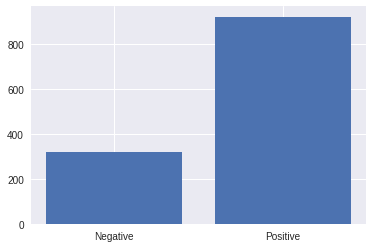

In [0]:
# Visualise number of positive and negative reviews
neg = [doc for idx, doc in SG_DF.iterrows() if doc['user_overall_rating'] <= 3]
pos = [doc for idx, doc in SG_DF.iterrows() if doc['user_overall_rating'] > 3]
plt.bar(['Positive', 'Negative'], [len(pos), len(neg)])
plt.show()

In [0]:
# Get all unique categories in dataset
unique_categories = []
for idx, doc in SG_DF.iterrows():
    for cat in doc['listed_category'].split(', '):        
        unique_categories.append(cat.strip())

unique_categories = set(unique_categories)
print("unique_categories: {}".format(len(unique_categories)))
print(unique_categories)
print()

# Count the total number comments on each categories.
# Note that categories will overlap.
rest_category = dict.fromkeys(unique_categories, 0)
for idx, doc in SG_DF.iterrows():
    for cat in doc['listed_category'].split(','):
        cat = cat.strip()
        rest_category[cat] += 1

rest_category = sorted(rest_category.items(), key=lambda k: k[1], reverse=True)
print(rest_category)

unique_categories: 49
{'Japanese', 'Restaurants', 'Modern European', 'Imported Food', 'Italian', 'Thai', 'Gelato', 'Brasseries', 'Cocktail Bars', 'Asian Fusion', 'Nasi Lemak', 'Street Vendors', 'Noodles', 'Lounges', 'Barbeque', 'Bars', 'Spanish', 'Food', 'Tapas/Small Plates', 'Ramen', 'Malaysian', 'French', 'Chinese', 'Soup', 'Food Stands', 'Australian', 'Steakhouses', 'Sushi Bars', 'Pakistani', 'Local Flavor', 'Cafes', 'Bakeries', 'Dim Sum', 'Farmers Market', 'Breakfast & Brunch', 'Mediterranean', 'Singaporean', 'American (Traditional)', 'Vegetarian', 'Indian', 'Cantonese', 'Wine Bars', 'Szechuan', 'Venues & Event Spaces', 'Shanghainese', 'Mexican', 'Ice Cream & Frozen Yogurt', 'Seafood', 'Fondue'}

[('Chinese', 267), ('Asian Fusion', 154), ('Noodles', 148), ('Steakhouses', 136), ('Singaporean', 125), ('French', 106), ('Indian', 102), ('Spanish', 79), ('Japanese', 67), ('Australian', 67), ('Food Stands', 56), ('Barbeque', 55), ('Thai', 53), ('Italian', 50), ('American (Traditional)', 

In [0]:
# Total reviews for top 4 categories
total_reviews = 0
chosen = []

for c in rest_category[:4]:
    total_reviews += c[1]
    chosen.append(c[0])
    
chosen = set(chosen)
print(chosen)
print(total_reviews)

{'Chinese', 'Asian Fusion', 'Steakhouses', 'Noodles'}
705


In [0]:
# Test
listed_category = []
restaurant_name = []
sentiment = []
user_review = []

# Train
train_listed_category = []
train_restaurant_name = []
train_sentiment = []
train_user_review = []

for idx, doc in SG_DF.iterrows():
    if pd.Series(doc['listed_category'].split(', ')).isin(chosen).any():
        listed_category.append(doc['listed_category'])
        restaurant_name.append(doc['restaurant_name'])
        sentiment.append(doc['sentiment'])
        user_review.append(doc['user_review'])
    else:
        train_listed_category.append(doc['listed_category'])
        train_restaurant_name.append(doc['restaurant_name'])
        train_sentiment.append(doc['sentiment'])
        train_user_review.append(doc['user_review'])

In [0]:
test = {}
test['listed_category'] = listed_category
test['restaurant_name'] = restaurant_name
test['sentiment'] = sentiment
test['user_review'] = user_review
df_test = pd.DataFrame.from_dict(test)

for idx, doc in df_test.iterrows():
    for c in doc['listed_category'].split(', '):
        for chosen in ['Noodles', 'Steakhouses', 'Asian Fusion', 'Chinese']:
            if c == chosen:
                df_test['listed_category'][idx] = c
                break

print(len(df_test))
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


550


,listed_category,restaurant_name,sentiment,user_review
0,Asian Fusion,85 Bedok North Fried Oyster,1,"Once or if we're lucky, twice every year we ge..."
1,Asian Fusion,Akira Back,1,2nd time back and really enjoyed the food. Thi...
2,Asian Fusion,Akira Back,1,"Excellent appetizers, rolls and miso soups. Mu..."
3,Asian Fusion,Akira Back,1,Have been waiting to write my review for this ...
4,Asian Fusion,Akira Back,1,Amazing sushi and great sake.....and the servi...


In [0]:
train = {}
train['listed_category'] = train_listed_category
train['restaurant_name'] = train_restaurant_name
train['sentiment'] = train_sentiment
train['user_review'] = train_user_review
df_train = pd.DataFrame.from_dict(train)

print(len(df_train))
df_train.head()

693


,listed_category,restaurant_name,sentiment,user_review
0,"Food Stands, Ramen, Singaporean",A Noodle Story,1,50 minute wait. We got into the line at 12:22 ...
1,"Food Stands, Ramen, Singaporean",A Noodle Story,1,The noodles definitely achieve the shop's goal...
2,"Food Stands, Ramen, Singaporean",A Noodle Story,1,This Singaporean take on ramen is special. Eac...
3,"Food Stands, Ramen, Singaporean",A Noodle Story,1,I was intrigued when I heard that there's a Si...
4,"Food Stands, Ramen, Singaporean",A Noodle Story,1,Yum yum yum! What a great way to take in the p...


In [0]:
df_test.to_csv(data_dir+'test_scored.csv', encoding='utf-8', index=False)
df_train.to_csv(data_dir+'train_scored.csv', encoding='utf-8', index=False)

In [0]:
# from google.colab import files

# files.download('test_yelp.csv')
# files.download('train_yelp.csv') 